In [1]:
import lightkurve as lk
%matplotlib inline

import numpy as np 

import exoplanet as xo

import matplotlib.pyplot as plt

In [2]:
search_result = lk.search_lightcurve(8038388, author = 'Kepler', cadence = 'long')
lc_collection = search_result.download_all()

In [3]:
r_jupiter = 0.1
r_neptune = 0.035
r_earth = 0.009

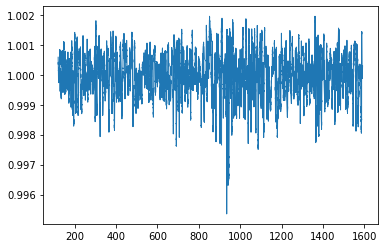

In [4]:
### THE DATA

lc_data = lc_collection.stitch()  ###THE NUMBER OF DATA SETS !!!!!

#lc_data.plot();
flux_data = lc_data.flux

length = len(lc_data)

delta = 2454833

first_time = lc_data.time[0].to_value('jd','float') - delta
last_time = lc_data.time[-1].to_value('jd','float') - delta

times_data = np.linspace(first_time,last_time,length)

median_data = np.median(flux_data)
normalized_data = flux_data/median_data

plt.plot(times_data, normalized_data, lw=1);

In [12]:
### MODEL --> CHANGE THE PERIOD, ETC...

r_planet = r_jupiter ## PLANET !
impact_parameter = 0.5  ## IMPACT PARAMETER !!

## THE PERIOD SAMPLE !
n = 25
np.random.seed(1)
uniform_sample = np.random.rand(n)
small_periods_sample = 365**uniform_sample  ##Periods
uniform_bis = np.random.rand(n)
#t0s = smaller_periods_sample * uniform_bis  ##t0s  ###INUTILE !!!
big_periods_sample = 365*(1+uniform_bis)
very_big_periods_sample = 1000*(1+0.4*uniform_bis)
mid_periods_sample = 180*(1+uniform_bis)
half_small_periods_sample = small_periods_sample/2
uniform_ter = np.random.rand(n)
very_small_periods_sample = 0.4*6**uniform_ter
very_small_bis = 0.45*(1+4*uniform_ter)
critical_periods_sample = 1.4*(1+0.6*uniform_ter)

1470.4623428341001 days of data


`period` contains 8216586 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


True period is 1.000675027410696 , Measured period is 8.255102040816325 d , Relative error is 7.249533379659604


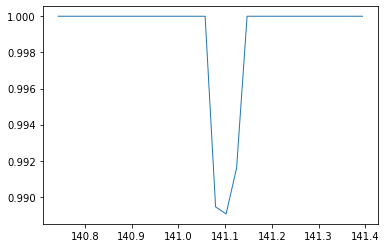

In [19]:
## THE PERIOD SAMPLE !
indices_range = [2]

##THE DATA AGAIN
print(last_time-first_time,"days of data")

# The star
r_star = 1
m_star = 1
u = [0.3,0.2]
model = xo.LimbDarkLightCurve(u)

#The planet
relative_errors = []
for loop in indices_range :
    true_period = small_periods_sample[loop] ###Change the sample !!
    orbit = xo.orbits.KeplerianOrbit(period=true_period, b=impact_parameter, r_star=r_star, m_star=m_star)
    
    #The light curve
    lc_temporary = model.get_light_curve(orbit, r=r_planet, t=times_data).eval()
    lc_model = lc_temporary + 1
    plt.plot(times_data[900:930], lc_model[900:930], lw=1);
    
    #Product MODEL * DATA
    data_times_model = lk.LightCurve(time = times_data)
    for k in range(length) :
        data_times_model.flux[k] = normalized_data[k]*lc_model[k]
    #data_times_model.plot();
    
    #Periodograms
    period_min = max(0.4, true_period/3)
    period_max = max(2*true_period, 10)
    period_space = np.linspace(0.5, period_max, 50) ### PERIODOGRAM PARAMETERS !!!
    periodogram = data_times_model.to_periodogram('bls', period=period_space) 
    #periodogram.plot();
    
    #Measured period
    measured_period = periodogram.period_at_max_power
    current_error = np.abs(true_period-measured_period.to_value('day'))/true_period
    
    print('True period is', true_period,', Measured period is', measured_period, ', Relative error is', current_error)
    relative_errors.append(current_error)
    #print('Relative error is', current_error)
    
#plt.scatter(periods_sample[indices_range], np.log10(relative_errors))
#plt.ylabel("Log of error")
#plt.xlabel("Period")    


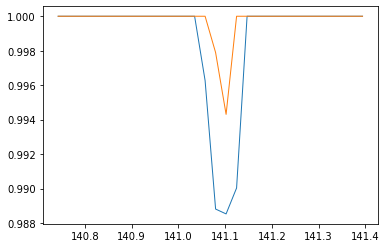

In [25]:
impact_test0 = 0
impact_test1 = 0.95
period_test = small_periods_sample[2] ###Change the sample !!
orbit0 = xo.orbits.KeplerianOrbit(period=period_test, b=impact_test0, r_star=r_star, m_star=m_star)
orbit1 = xo.orbits.KeplerianOrbit(period=period_test, b=impact_test1, r_star=r_star, m_star=m_star)   
#The light curve
lc_test0 = model.get_light_curve(orbit0, r=r_planet, t=times_data).eval()
lc_test0 = lc_test0 + 1
plt.plot(times_data[900:930], lc_test0[900:930], lw=1);
lc_test1 = model.get_light_curve(orbit1, r=r_planet, t=times_data).eval()
lc_test1 = lc_test1 + 1
plt.plot(times_data[900:930], lc_test1[900:930], lw=1);

0  :  1.1645588142723716e-05
1  :  0.00017807587180879468
2  :  0.9999502388207784
3  :  3.384348782413872e-05
4  :  0.00023661346576563398
5  :  0.00023107723004934163
6  :  3.824506412563368e-06
7  :  0.9999999999999998
8  :  4.763637687935212e-05
9  :  8.458602734250808e-05
10  :  0.00012544844258691106
11  :  0.00019333673224829223
12  :  4.32941118009481e-05
13  :  7.5611609651116875e-06
14  :  1.0001938539848978
15  :  0.000190697730445758
16  :  2.472357207777817e-05
17  :  5.9078113735141984e-05
18  :  2.0000522252154544
19  :  0.00016025543561314025
20  :  2.3650658626753033e-05
21  :  0.0001733924656191922
22  :  5.294756114888598e-05
23  :  2.4165452540948914e-05
24  :  2.1989931651269792e-05


Text(0.5, 0, 'period')

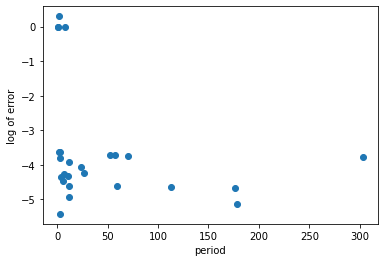

In [8]:
for k in range(n) :
    print (k, " : ", relative_errors[k])

plt.scatter(small_periods_sample[indices_range], np.log10(relative_errors))
plt.ylabel("log of error")
plt.xlabel("period") 

In [ ]:
##PLOTTING (just to see)
#plt.plot(times_data, lc_model, lw=1);
#plt.ylabel("relative flux")
#plt.xlabel("time [days]")
#_ = plt.xlim(times_data.min(), times_data.max())

#final_lc = lk.LightCurve(time = times_data, flux = data_times_model_last)

#flat_lc = final_lc.flatten()

#data_times_model.plot();

#print(data_times_model_last[20:25])

In [ ]:
#period_space = np.linspace(true_period/2.5,true_period*2,20000)
#print(period_space)

periodogram = data_times_model.to_periodogram('bls', frequency_factor=10000)
periodogram.plot();


measured_period = periodogram.period_at_max_power

print(measured_period)